In [63]:
import os

import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [64]:
script_path = os.getcwd()
# print(script_path)
data_path_1= r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
# print(os.listdir(data_path))
pd_raw=pd.read_csv(data_path_1)
pd_raw.head()

data_path_2= r"https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/vaccine_data/global_data/time_series_covid19_vaccine_global.csv"

data_path_3= r"https://raw.githubusercontent.com/govex/COVID-19/master/data_tables/world_pop_by_country.csv"
# print(os.listdir(data_path))
pd_raw_vacc=pd.read_csv(data_path_2)
# pd_raw_vacc.to_csv('../data/processed/time_series_covid19_vaccine_global.csv',sep=';')
pd_pop=pd.read_csv(data_path_3)
print(pd_raw_vacc.head())
print(pd_raw.head())
print(pd_pop.head())

  Country_Region        Date  Doses_admin  People_partially_vaccinated  \
0         Canada  2020-12-14          5.0                          0.0   
1          World  2020-12-14          5.0                          0.0   
2         Canada  2020-12-15        723.0                          0.0   
3          China  2020-12-15    1500000.0                          0.0   
4         Russia  2020-12-15      28500.0                      28500.0   

   People_fully_vaccinated Report_Date_String    UID Province_State  
0                      0.0         2020-12-14  124.0            NaN  
1                      0.0         2020-12-14    NaN            NaN  
2                      0.0         2020-12-15  124.0            NaN  
3                      0.0         2020-12-15  156.0            NaN  
4                      0.0         2020-12-15  643.0            NaN  
  Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0

In [65]:
time_idx = pd_raw.columns[4:]
df_plot = pd.DataFrame({ 'date': time_idx})
df_plot.head()
time_idx_vacc= pd_raw_vacc['Date'].drop_duplicates()
df_plot_vacc = pd.DataFrame({ 'date': time_idx_vacc})
df_plot_vacc
df_plot_pop= pd_pop

In [66]:
pd_raw[pd_raw["Country/Region"] == 'Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

         date         India            US      Italy
0     1/22/20  0.000000e+00  3.056539e-07   0.000000
1     1/23/20  0.000000e+00  3.056539e-07   0.000000
2     1/24/20  0.000000e+00  6.113078e-07   0.000000
3     1/25/20  0.000000e+00  6.113078e-07   0.000000
4     1/26/20  0.000000e+00  1.528269e-06   0.000000
5     1/27/20  0.000000e+00  1.528269e-06   0.000000
6     1/28/20  0.000000e+00  1.528269e-06   0.000000
7     1/29/20  0.000000e+00  1.833923e-06   0.000000
8     1/30/20  7.393074e-08  1.833923e-06   0.000000
9     1/31/20  7.393074e-08  2.445231e-06   0.000003
10     2/1/20  7.393074e-08  2.445231e-06   0.000003
11     2/2/20  1.478615e-07  2.445231e-06   0.000003
12     2/3/20  2.217922e-07  3.362193e-06   0.000003
13     2/4/20  2.217922e-07  3.362193e-06   0.000003
14     2/5/20  2.217922e-07  3.362193e-06   0.000003
15     2/6/20  2.217922e-07  3.667847e-06   0.000003
16     2/7/20  2.217922e-07  3.667847e-06   0.000005
17     2/8/20  2.217922e-07  3.667847e-06   0.

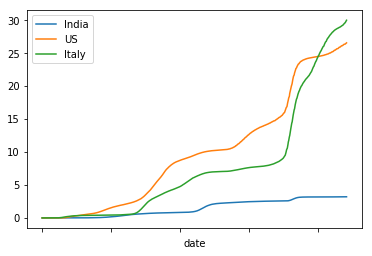

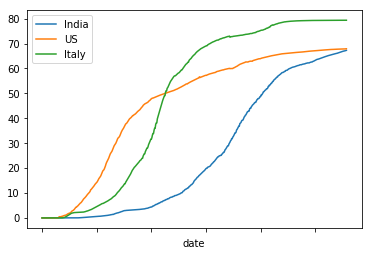

In [67]:
Country_list = ["India", "US", "Italy"]
def get_pop(country = ""):
    pop_val= df_plot_pop.drop(["Country Code"], axis= 1).set_index("Country Name").loc[country,"2018"]
    return pop_val



for each in Country_list:
    df_plot[each]=np.array(pd_raw[pd_raw["Country/Region"] == each].iloc[:,4::].sum(axis=0))
    df_plot[each]=df_plot[each]*(100/get_pop(each))


for each in Country_list:
    f = pd_raw_vacc[pd_raw_vacc["Country_Region"] == each].iloc[:,[1,4]]
    final =f.dropna().set_index('Date')
    adddates= pd.date_range(df_plot_vacc.loc[0].at['date'],df_plot_vacc.iloc[-1].at['date'])
    final.index = pd.DatetimeIndex(final.index)
    s = final.reindex(adddates, fill_value=0)
    df_plot_vacc[each]= np.array(s)
    df_plot_vacc[each]=df_plot_vacc[each]*(100/get_pop(each))


#
#
#
# df_plot_vacc['India']=df_plot_vacc['India']*(100/1393409038)
# df_plot_vacc['US']=df_plot_vacc['US']*(100/329824950)
# df_plot_vacc['Germany']=df_plot_vacc['Germany']*(100/82927922)


print(df_plot)
print(df_plot_vacc)

%matplotlib inline
df_plot.set_index('date').plot()
df_plot_vacc.set_index('date').plot()

In [15]:
df_plot.date[0]

'1/22/20'

In [49]:
time_idx= [datetime.strptime(df_plot.date[0], "%m/%d/%y") for each in df_plot.date]
time_str = [each.strftime("%y-%m-%d") for each in time_idx]

In [50]:
df_plot["date"] = time_idx
type(df_plot["date"][0])
df_plot.head()

,date,India,US,Germany,China,France
0,2020-01-22,0,1,0,548,0
1,2020-01-22,0,1,0,643,0
2,2020-01-22,0,2,0,920,2
3,2020-01-22,0,2,0,1406,3
4,2020-01-22,0,5,0,2075,3


In [52]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';')

In [53]:
script_path = os.getcwd()
# print(script_path)
data_path= os.path.join(script_path, r"..\data\raw\time_series_covid19_confirmed_global.csv")
# print(os.listdir(data_path))
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179321,179328,179477,179597,179624,179674,179716,179716,179771,179835
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275621,275688,275732,275732,275732,275838,275864,275881,275939,275985
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265823,265828,265834,265841,265847,265851,265854,265855,265860,265862
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,42156,42156,42572,42572,42572,42572,42572,42572,42572,42894
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99433,99527


In [55]:
pd_data_base= pd_raw.rename(columns={"Country/Region": "country", "Province/State":"state"})
pd_data_base = pd_data_base.drop(["Lat", "Long"],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22,5/21/22,5/22/22,5/23/22,5/24/22,5/25/22
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,179321,179328,179477,179597,179624,179674,179716,179716,179771,179835
1,NaN,Albania,0,0,0,0,0,0,0,0,...,275621,275688,275732,275732,275732,275838,275864,275881,275939,275985
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,265823,265828,265834,265841,265847,265851,265854,265855,265860,265862
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,42156,42156,42572,42572,42572,42572,42572,42572,42572,42894
4,NaN,Angola,0,0,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99433,99527


In [72]:
pd_relational_data = pd_data_base.set_index(["state","country"]).T.stack(level = [0,1]).reset_index().rename(columns = { 'level_0': 'date',0:'confirmed'})
pd_relational_data.dtypes
pd_relational_data['date']= pd_relational_data.date.astype('datetime64[ns]')
pd_relational_data.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [73]:
pd_relational_data.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';')


In [86]:
script_path = os.getcwd()
# print(script_path)
data_path= os.path.join(script_path, r"..\data\raw\time_series_covid19_vaccine_global.csv")
# print(os.listdir(data_path))
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Country_Region,Date,Doses_admin,People_partially_vaccinated,People_fully_vaccinated,Report_Date_String,UID,Province_State
0,Canada,2020-12-14,5.0,0.0,0.0,2020-12-14,124.0,NaN
1,World,2020-12-14,5.0,0.0,0.0,2020-12-14,NaN,NaN
2,Canada,2020-12-15,723.0,0.0,0.0,2020-12-15,124.0,NaN
3,China,2020-12-15,1500000.0,0.0,0.0,2020-12-15,156.0,NaN
4,Russia,2020-12-15,28500.0,28500.0,0.0,2020-12-15,643.0,NaN


In [82]:
time_idx = pd_raw.columns[12:]
df_plot = pd.DataFrame({ 'date': time_idx})
df_plot.head()




,date
0,2020-12-12
1,2020-12-13
2,2020-12-14
3,2020-12-15
4,2020-12-16


KeyError: 'Country_Region'

1352617328.0